In [59]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploración de datos
## a. Importar los datos obtenidos en la Feria de León 2025 a través de la página web Mapa de Bienestar

In [60]:
data = pd.read_csv('data/data-mapa-bienestar.csv')
data.head(5)

,id,age_years,country,municipality,name,sex,state,age_at_menarche_years,breast_cancer_first_degree_relatives,breathlessness_last_4_weeks,...,pack_years_value,pack_years_interpretation,sarcopenia_risk_value,sarcopenia_risk_interpretation,copd_risk_value,copd_risk_interpretation,ost_score_value,ost_score_interpretation,breast_cancer_risk_value,breast_cancer_risk_interpretation
0,1,80,México,León,Diego Cesar Lerma Torres,MALE,Guanajuato,NaN,NaN,NEVER,...,0.00,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,-5.0,Alto riesgo de osteoporosis,NaN,NaN
1,2,70,México,León,Diego Cesar Lerma Torres,MALE,Guanajuato,NaN,NaN,NEVER,...,0.00,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN
2,3,20,México,Guanajuato,Brandon Lee Agüero Fernández,MALE,Guanajuato,NaN,NaN,NEVER,...,0.00,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,10.0,Bajo riesgo de osteoporosis,NaN,NaN
3,4,12,México,León,Jju,FEMALE,Guanajuato,MORE_THAN_13_YEARS,UNKNOWN,NEVER,...,0.25,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN
4,493,45,México,León,Rendirá solano,FEMALE,Guanajuato,AGE_12_13_YEARS,ONE,NEVER,...,0.00,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN


## b. Eliminar valores de prueba

In [61]:
nombres_de_prueba = ['Diego Lerma', 'Diego Cesar Lerma Torres', 'Brandon Lee Agüero Fernández', 'Brandon Lee Agüero Fernández ', 'Jju', 'Diego', 'Dgg', 'Skd', 'Libia Denisse']


In [62]:
data = data[~data['name'].isin(nombres_de_prueba)]

data

,id,age_years,country,municipality,name,sex,state,age_at_menarche_years,breast_cancer_first_degree_relatives,breathlessness_last_4_weeks,...,pack_years_value,pack_years_interpretation,sarcopenia_risk_value,sarcopenia_risk_interpretation,copd_risk_value,copd_risk_interpretation,ost_score_value,ost_score_interpretation,breast_cancer_risk_value,breast_cancer_risk_interpretation
4,493,45,México,León,Rendirá solano,FEMALE,Guanajuato,AGE_12_13_YEARS,ONE,NEVER,...,0.0,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN
5,5,25,México,Querétaro,Carlos Mendoza,MALE,Querétaro,NaN,NaN,NEVER,...,0.0,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,9.0,Bajo riesgo de osteoporosis,NaN,NaN
9,9,20,México,León,Joao Norberto Carrasco Pérez,MALE,Guanajuato,NaN,NaN,NEVER,...,0.0,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN
12,11,50,México,León,Joao Norberto Carrasco Pérez,MALE,Guanajuato,NaN,NaN,NEVER,...,0.0,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN
23,23,25,México,León,Qw,MALE,Guanajuato,NaN,NaN,NEVER,...,0.0,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,1581,48,México,León,Santa mónica,FEMALE,Guanajuato,AGE_7_11_YEARS,NONE,SHORT_TIME,...,0.0,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,3.0,Bajo riesgo de osteoporosis,NaN,NaN
1581,1582,35,México,León,Lizeth lino,FEMALE,Guanajuato,AGE_12_13_YEARS,NONE,NEVER,...,0.0,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,NaN,NaN,NaN,NaN
1582,1583,40,México,León,Jose,MALE,Guanajuato,NaN,NaN,SHORT_TIME,...,0.0,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,10.0,Bajo riesgo de osteoporosis,NaN,NaN
1583,1584,27,México,León,Miguel Gustavo Alexis Olvera Urbina,MALE,Guanajuato,NaN,NaN,NEVER,...,0.0,Riesgo Bajo de Enfermedad Pulmonar Obstructiva...,0,Sin riesgo de sarcopenia,0,Baja probabilidad de Enfermedad Pulmonar Obstr...,14.0,Bajo riesgo de osteoporosis,NaN,NaN


## c. Análisis exploratorio de datos

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, 4 to 1584
Data columns (total 83 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         1556 non-null   int64  
 1   age_years                                  1556 non-null   int64  
 2   country                                    1556 non-null   object 
 3   municipality                               1556 non-null   object 
 4   name                                       1489 non-null   object 
 5   sex                                        1556 non-null   object 
 6   state                                      1556 non-null   object 
 7   age_at_menarche_years                      925 non-null    object 
 8   breast_cancer_first_degree_relatives       925 non-null    object 
 9   breathlessness_last_4_weeks                1556 non-null   object 
 10  cigarettes_per_day           

In [64]:
data.describe()

,id,age_years,cigarettes_per_day,difficulty_carrying_weight,difficulty_climbing_stairs,difficulty_crossing_room,difficulty_rising_from_bed,falls_last_year,height_meters,moderate_activity_days,...,bee_basal,bee_total,ipaq_total_met_minutes,ipaq_total_calories,pack_years_value,sarcopenia_risk_value,copd_risk_value,ost_score_value,breast_cancer_risk_value,breast_cancer_risk_interpretation
count,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1441.000000,1556.000000,...,1.437000e+03,1.437000e+03,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1448.000000,0.0,0.0
mean,805.984576,31.809769,0.517352,0.019280,0.011568,0.001285,0.008355,0.020566,1.597127,1.583548,...,1.159844e+04,2.103797e+04,4566.544987,6232.624679,0.425386,0.061054,0.129820,155.444061,NaN,NaN
std,450.497210,16.440944,2.316519,0.167104,0.128788,0.035840,0.097859,0.146430,0.167525,1.914262,...,3.631813e+05,6.895130e+05,6350.240895,8667.948846,3.025269,0.431255,0.490276,5269.963706,NaN,NaN
min,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.000000,...,5.171700e+02,8.016200e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,NaN,NaN
25%,416.750000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.540000,0.000000,...,1.339430e+03,1.837220e+03,876.000000,1195.000000,0.000000,0.000000,0.000000,4.000000,NaN,NaN
50%,805.500000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610000,1.000000,...,1.472540e+03,2.154820e+03,2455.500000,3351.000000,0.000000,0.000000,0.000000,7.000000,NaN,NaN
75%,1196.250000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,3.000000,...,1.681560e+03,2.590920e+03,5653.750000,7716.750000,0.000000,0.000000,0.000000,9.000000,NaN,NaN
max,1585.000000,152.000000,45.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,7.000000,...,1.375092e+07,2.612674e+07,69095.000000,94314.000000,67.500000,6.000000,6.000000,199997.000000,NaN,NaN


# 2. Preprocesamiento de datos
## a. Separar los datos que están en objetos en columnas independientes

Estos son:
- bee_activity
- ipaq_activities
- ipaq_sedentary_time







In [65]:
def parse_json_column(series, prefix, keys, is_list=False, max_list_elements=None):
    """
    Parsea una columna cuyos elementos son cadenas JSON y expande sus datos en nuevas columnas.

    Parámetros:
      series (pd.Series): Columna que contiene cadenas JSON.
      prefix (str): Prefijo para los nombres de las nuevas columnas.
      keys (list): Lista de claves a extraer del JSON.
         - Si is_list==False, se espera que la cadena sea un objeto JSON (diccionario).
         - Si is_list==True, se espera que la cadena sea una lista de diccionarios.
      is_list (bool): Indica si se debe procesar la cadena como una lista de diccionarios. Por defecto es False.
      max_list_elements (int o None): Número máximo de elementos de la lista a considerar para crear columnas consistentes.
         Si se deja en None y is_list==True, se calculará el máximo número de elementos presentes en la columna.
         
    Retorna:
      pd.DataFrame: DataFrame con las nuevas columnas extraídas.
      
    Ejemplos de uso:
    
      # Para bee_activity (objeto JSON)
      df_bee = parse_json_column(data['bee_activity'], "bee_activity", ["level", "factor", "description"], is_list=False)
      
      # Para ipaq_activities (lista de diccionarios)
      df_ipaq = parse_json_column(data['ipaq_activities'], "ipaq_activities", ["name", "met_minutes", "calories"], is_list=True)
      
      # Para ipaq_sedentary_time (objeto JSON)
      df_sedentary = parse_json_column(data['ipaq_sedentary_time'], "ipaq_sedentary_time", ["hours", "minutes"], is_list=False)
    """
    import json
    import pandas as pd

    def parse_value(x):
        # Si el valor es NaN o no es una cadena, se retorna una lista o diccionario vacío según el caso
        if pd.isna(x) or not isinstance(x, str):
            return [] if is_list else {}
        try:
            return json.loads(x)
        except (json.JSONDecodeError, TypeError):
            return [] if is_list else {}

    if is_list and max_list_elements is None:
        def safe_len(x):
            parsed = parse_value(x)
            return len(parsed) if isinstance(parsed, list) else 0
        # Se calcula el máximo y se fuerza la conversión a entero; si no se obtiene un valor se asigna 0.
        max_len = series.apply(safe_len).max()
        max_list_elements = int(max_len) if max_len is not None else 0

    new_data = []
    for value in series:
        parsed = parse_value(value)
        if not is_list:
            # Caso: objeto JSON (diccionario)
            row = {f"{prefix}_{key}": parsed.get(key) if isinstance(parsed, dict) else None for key in keys}
        else:
            # Caso: lista de diccionarios
            row = {}
            if isinstance(parsed, list):
                for i in range(max_list_elements):
                    if i < len(parsed) and isinstance(parsed[i], dict):
                        for key in keys:
                            row[f"{prefix}_{i+1}_{key}"] = parsed[i].get(key)
                    else:
                        for key in keys:
                            row[f"{prefix}_{i+1}_{key}"] = None
            else:
                for i in range(max_list_elements):
                    for key in keys:
                        row[f"{prefix}_{i+1}_{key}"] = None
        new_data.append(row)

    return pd.DataFrame(new_data, index=series.index)

In [66]:
# 1. Parsear bee_activity (objeto JSON)
df_bee = parse_json_column(data['bee_activity'], "bee_activity", ["level", "factor", "description"], is_list=False)


In [67]:
# 2. Parsear ipaq_activities (lista de diccionarios)
df_ipaq = parse_json_column(data['ipaq_activities'], "ipaq_activities", ["name", "met_minutes", "calories"], is_list=True)


In [68]:
# 3. Parsear ipaq_sedentary_time (objeto JSON)
df_sedentary = parse_json_column(data['ipaq_sedentary_time'], "ipaq_sedentary_time", ["hours", "minutes"], is_list=False)


In [69]:
# Combinar las nuevas columnas con el DataFrame original (opcional)
data = pd.concat([data, df_bee, df_ipaq, df_sedentary], axis=1)


In [70]:
# Verificar el resultado
data.head()

,id,age_years,country,municipality,name,sex,state,age_at_menarche_years,breast_cancer_first_degree_relatives,breathlessness_last_4_weeks,...,ipaq_activities_1_met_minutes,ipaq_activities_1_calories,ipaq_activities_2_name,ipaq_activities_2_met_minutes,ipaq_activities_2_calories,ipaq_activities_3_name,ipaq_activities_3_met_minutes,ipaq_activities_3_calories,ipaq_sedentary_time_hours,ipaq_sedentary_time_minutes
4,493,45,México,León,Rendirá solano,FEMALE,Guanajuato,AGE_12_13_YEARS,ONE,NEVER,...,396,540,Actividad física moderada,0,0,Actividad física vigorosa,0,0,0,0
5,5,25,México,Querétaro,Carlos Mendoza,MALE,Querétaro,NaN,NaN,NEVER,...,1386,1891,Actividad física moderada,720,982,Actividad física vigorosa,1920,2620,6,0
9,9,20,México,León,Joao Norberto Carrasco Pérez,MALE,Guanajuato,NaN,NaN,NEVER,...,0,0,Actividad física moderada,0,0,Actividad física vigorosa,0,0,0,0
12,11,50,México,León,Joao Norberto Carrasco Pérez,MALE,Guanajuato,NaN,NaN,NEVER,...,0,0,Actividad física moderada,0,0,Actividad física vigorosa,0,0,0,0
23,23,25,México,León,Qw,MALE,Guanajuato,NaN,NaN,NEVER,...,0,0,Actividad física moderada,0,0,Actividad física vigorosa,0,0,0,0


# 3. Análisis de Datos

## a. Análisis de edad

In [71]:
data.age_years.describe()

count    1556.000000
mean       31.809769
std        16.440944
min         3.000000
25%        17.000000
50%        31.000000
75%        43.000000
max       152.000000
Name: age_years, dtype: float64

/tmp/ipykernel_15847/1638988458.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")


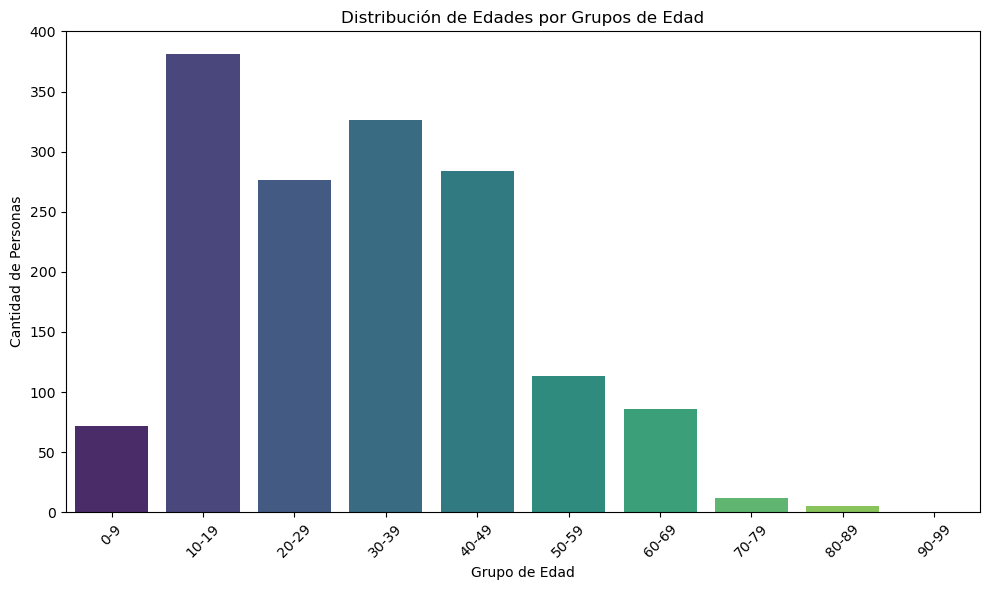

In [75]:
# Definir los límites de los intervalos (bins).
# Se asume que las edades varían entre 0 y 160, lo cual es suficiente para el rango observado (min: 3, max: 152)
bins = list(range(0, 101, 10))
# Crear etiquetas para los grupos, por ejemplo "0-9", "10-19", etc.
labels = [f"{b}-{b+9}" for b in bins[:-1]]

# Crear la columna 'age_group' usando pd.cut con los intervalos definidos.
# Aquí se usa right=False para que los intervalos incluyan el límite inferior y excluyan el superior,
# de forma que 0-9 incluya las edades entre 0 y 9.
data['age_group'] = pd.cut(data['age_years'], bins=bins, labels=labels, right=False, include_lowest=True)

# Contar el número de personas en cada grupo de edad y ordenar los grupos por orden natural (de menor a mayor edad).
age_group_counts = data['age_group'].value_counts().sort_index()

# Graficar la distribución usando un gráfico de barras.
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")
plt.title("Distribución de Edades por Grupos de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## b. Análisis de ubicación geográfica

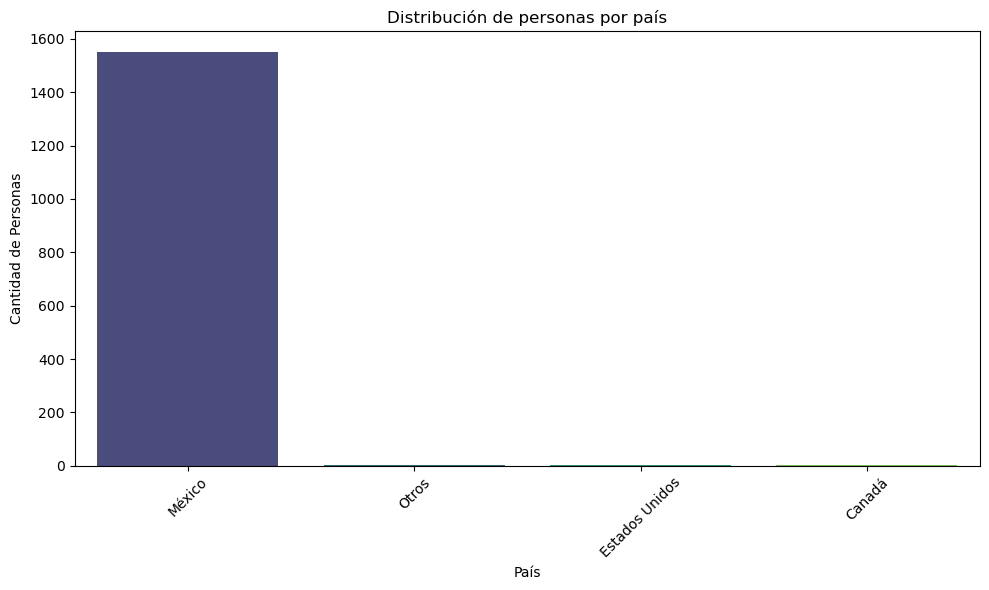

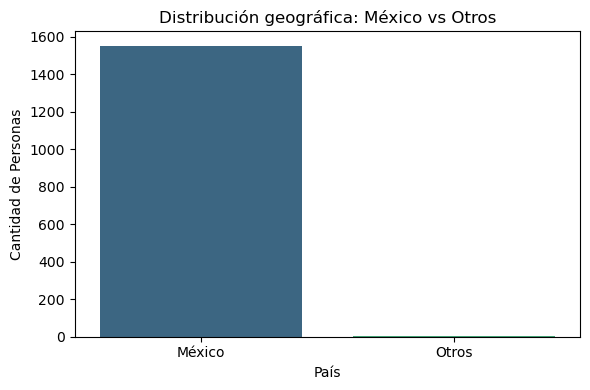

In [78]:
# Opción 1: Distribución de personas por país
plt.figure(figsize=(10, 6))
country_counts = data['country'].value_counts()

ax = sns.barplot(
    x=country_counts.index,
    y=country_counts.values,
    hue=country_counts.index,
    dodge=False,
    palette="viridis"
)
# Verificamos si se creó una leyenda y, de ser así, la eliminamos
legend = ax.get_legend()
if legend is not None:
    legend.remove()

plt.title("Distribución de personas por país")
plt.xlabel("País")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Opción 2: Agrupar en "México" y "Otros"
data['pais_grupo'] = data['country'].apply(lambda x: 'México' if x == 'México' else 'Otros')
pais_grupo_counts = data['pais_grupo'].value_counts()

plt.figure(figsize=(6, 4))
ax2 = sns.barplot(
    x=pais_grupo_counts.index,
    y=pais_grupo_counts.values,
    hue=pais_grupo_counts.index,
    dodge=False,
    palette="viridis"
)
legend2 = ax2.get_legend()
if legend2 is not None:
    legend2.remove()

plt.title("Distribución geográfica: México vs Otros")
plt.xlabel("País")
plt.ylabel("Cantidad de Personas")
plt.tight_layout()
plt.show()

/tmp/ipykernel_15847/2111657368.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


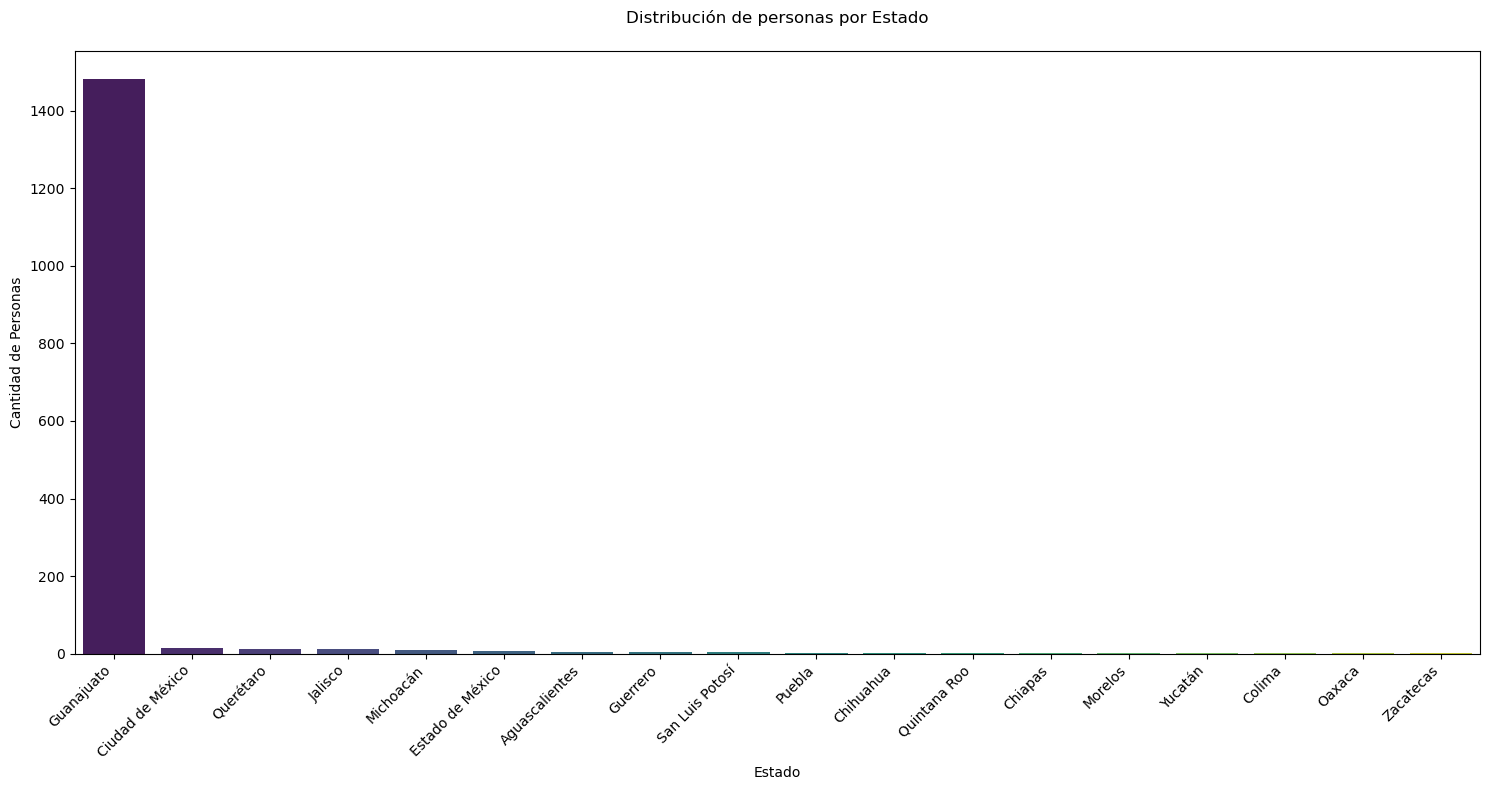

In [85]:
# Opción: Distribución de personas por estado
plt.figure(figsize=(15, 8))  # Aumentamos el tamaño de la figura

# Ordenamos los datos de mayor a menor para mejor visualización
state_counts = data['state'].value_counts()

ax = sns.barplot(
    x=state_counts.index,
    y=state_counts.values,
    palette="viridis"
)

# Configuración del gráfico
plt.title("Distribución de personas por Estado", pad=20)
plt.xlabel("Estado")
plt.ylabel("Cantidad de Personas")

# Rotamos y ajustamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustamos los márgenes para evitar que se corten las etiquetas
plt.tight_layout()

plt.show()

/tmp/ipykernel_15847/4061583414.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


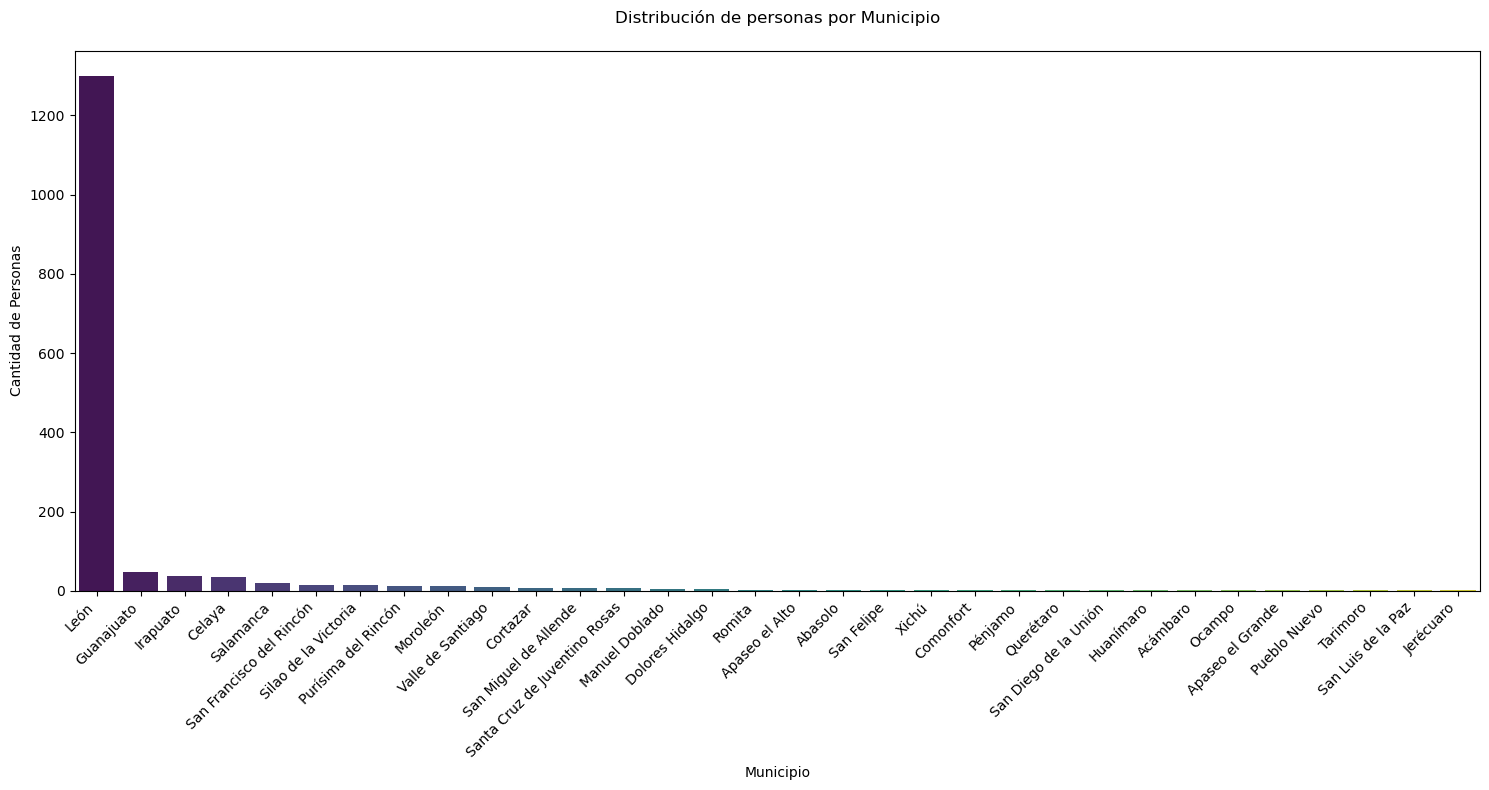

In [80]:
# Opción: Distribución de personas por municipio
plt.figure(figsize=(15, 8))  # Aumentamos el tamaño de la figura

# Ordenamos los datos de mayor a menor para mejor visualización
municipality_counts = data['municipality'].value_counts()

ax = sns.barplot(
    x=municipality_counts.index,
    y=municipality_counts.values,
    palette="viridis"
)

# Configuración del gráfico
plt.title("Distribución de personas por Municipio", pad=20)
plt.xlabel("Municipio")
plt.ylabel("Cantidad de Personas")

# Rotamos y ajustamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustamos los márgenes para evitar que se corten las etiquetas
plt.tight_layout()

plt.show()

## c. Análisis por sexo 

In [82]:
data.sex.value_counts()

sex
FEMALE    925
MALE      631
Name: count, dtype: int64

/tmp/ipykernel_15847/90368653.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


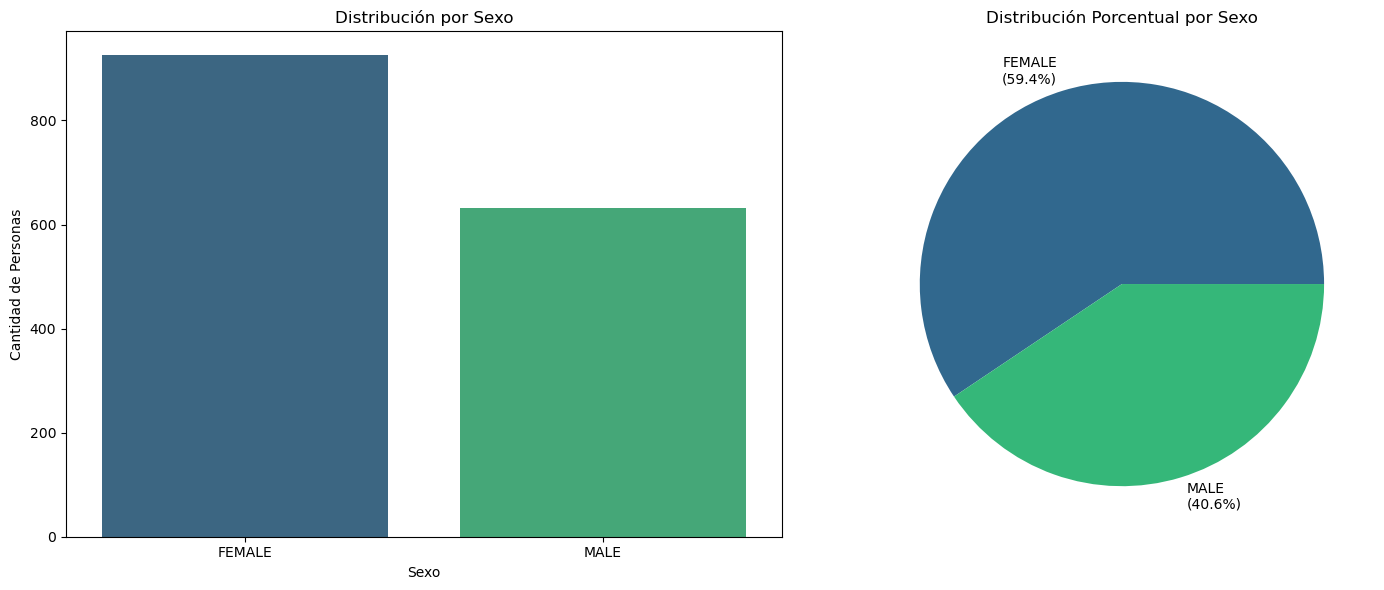


Distribución por sexo:
FEMALE: 925 personas (59.4%)
MALE: 631 personas (40.6%)


In [83]:
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Gráfico de barras
sex_counts = data['sex'].value_counts()
sns.barplot(
    x=sex_counts.index,
    y=sex_counts.values,
    ax=ax1,
    palette="viridis"
)
ax1.set_title("Distribución por Sexo")
ax1.set_xlabel("Sexo")
ax1.set_ylabel("Cantidad de Personas")

# 2. Gráfico de pastel con porcentajes
sex_percentages = (sex_counts / len(data) * 100).round(1)
ax2.pie(
    sex_percentages,
    labels=[f'{idx}\n({val}%)' for idx, val in sex_percentages.items()],
    autopct='',
    colors=sns.color_palette("viridis", n_colors=len(sex_counts))
)
ax2.set_title("Distribución Porcentual por Sexo")

plt.tight_layout()
plt.show()

# Mostrar los valores numéricos
print("\nDistribución por sexo:")
for sex, count in sex_counts.items():
    percentage = sex_percentages[sex]
    print(f"{sex}: {count} personas ({percentage}%)")